*Курсив*# Logistic Regression as a Neural Network 
(partly following deeplearning.ai lab)

    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent) 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
EPS = 0.001

## General Architecture of the algorithm ##


Build a Logistic Regression, using a Neural Network mindset.

**Logistic Regression is actually a very simple Neural Network!**


**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})$$

**Key steps**:
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

## Parts of our algorithm ## 

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features, number of layers, number of neurons in the layer etc.) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

Build 1-3 separately and integrate them into one function we call `model()`.

### Sigmoid

$sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ 

In [ ]:
# sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1./(1.+np.exp(-z))
    
    return s

In [ ]:
print ("sigmoid([0, 2, 10, -10]) = " + str(sigmoid(np.array([0., 2., -2., 100.]))))

sigmoid([0, 2, 10, -10]) = [0.5        0.88079708 0.11920292 1.        ]


### Initializing parameters



In [ ]:
# initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim,1))
    b = 0.
    
    return w, b

In [ ]:
dim = 3
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]
 [0.]]
b = 0.0


### Forward and Backward propagation

Implement a function `propagate()` that computes the cost function and its gradient.

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas we should use: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$

In [ ]:
# propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    m = X.shape[1]
    #print('number of objects = ',len(X))
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b )                                 # compute activation
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

def propagate_sgd(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b

    """
    m = X.shape[1]
    # print('number of objects = ',len(X))

    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T, X) + b)  # compute activation
    cost = -(1. / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)  # compute cost

    # BACKWARD PROPAGATION (TO FIND GRAD)
    random_indexes = np.random.choice(X.shape[1], 100, replace=False)
    X_ = X[:, random_indexes]
    A_ = A[:, random_indexes]
    Y_ = Y[random_indexes]
    dw = (1. / m) * np.dot(X_, (A_ -  Y_).T)
    db = (1. / m) * np.sum(A_ - Y_, axis=1)

    grads = {"dw": dw,
             "db": db}

    return grads, cost

In [ ]:
w, b, X, Y = np.array([[1.],[-1.]]), 4., np.array([[1.,5.,-1.],[10.,0.,-3.2]]), np.array([[0,1,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.0027004 ]
 [0.02446984]]
db = [0.00151471]
cost = [0.00295537]


### Optimization
- We have initialized the parameters.
- We are able to compute a cost function and its gradient.
- Now, we have to update the parameters using gradient descent.

For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [ ]:
# optimize
from numpy.random import permutation, randint

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False, mode="GD"):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    mode -- "GD"/"SGD"/"adam", defaults to "GD"
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    if mode == "adam":
	    b1 = 0.9
	    b2 = 0.999 
	    # Variable Initialization
	    num_param = X.shape[0]
	    
	    m_w = np.zeros((num_param, 1)) # two m for each parameter
	    v_w = np.zeros((num_param, 1)) # two v for each parameter
	    g_w = np.zeros((num_param, 1)) # two gradient
	
	    num_param_b = 1
	    m_b = np.zeros((num_param_b, 1)) # two m for each parameter
	    v_b = np.zeros((num_param_b, 1)) # two v for each parameter
	    g_b = np.zeros((num_param_b, 1)) # two gradient            
    
    for i in range(num_iterations):
                
        # Cost and gradient calculation 
        if mode == "SGD":
          grads, cost = propagate_sgd(w,b,X,Y)
        elif mode == "adam":
	        rand = randint(0, X.shape[1])
	        X_c = X[:, rand:rand+1]
	        Y_c = Y[rand]
	        grads, cost = propagate(w,b,X_c,Y_c)          
        else:
          grads, cost = propagate(w,b,X,Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        if mode == "adam":
	        # Update the m and v parameter
	        m_w = b1*m_w + (1 - b1)*dw
	        v_w = b2*v_w + (1 - b2)*(dw**2)
	
	        m_b = b1*m_b + (1 - b1)*db
	        v_b = b2*v_b + (1 - b2)*(db**2)
	
	        # Bias correction for m and v
	        m_cor_w = m_w / (1 - (b1**(i+1))) 
	        v_cor_w = v_w / (1 - (b2**(i+1)))
         
	        m_cor_b = m_b / (1 - (b1**(i+1))) 
	        v_cor_b = v_b / (1 - (b2**(i+1)))
	
	        # Update the parameter  
	        w = w - (learning_rate / (np.sqrt(v_cor_w) + EPS))*m_cor_w
	        b = b - (learning_rate / (np.sqrt(v_cor_b) + EPS))*m_cor_b            
        else:          
          w -=learning_rate*dw
          b -=learning_rate*db
        
        # Record the costs
        costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs
    

In [ ]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 1000, learning_rate = 0.005, print_cost = True)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

Cost after iteration 0: 0.002955
Cost after iteration 100: 0.002683
Cost after iteration 200: 0.002461
Cost after iteration 300: 0.002278
Cost after iteration 400: 0.002124
Cost after iteration 500: 0.001991
Cost after iteration 600: 0.001877
Cost after iteration 700: 0.001777
Cost after iteration 800: 0.001689
Cost after iteration 900: 0.001611
w = [[ 0.99092423]
 [-1.08149946]]
b = [3.99591156]
dw = [[0.00128065]
 [0.01144573]]
db = [0.00041775]


Implement the `predict()` function. There are two steps to compute predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of A into 0 (if activation <= 0.5) or 1 (if activation > 0.5), store the predictions in a vector `Y_prediction`. 

In [ ]:
# predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities 
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1
    
    return Y_prediction

In [ ]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]



Already have:
- Initialize (w,b)
- Optimize the loss iteratively to learn parameters (w,b):
    - computing the cost and its gradient 
    - updating the parameters using gradient descent
- Use the learned (w,b) to predict the labels for a given set of examples

## Merge it all into a model ##

    - Y_prediction_test for the predictions on the test set
    - Y_prediction_train for the predictions on the train set
    - w, costs, grads for the outputs of optimize()

In [ ]:
# model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False, mode="GD"):
    """
    Builds the logistic regression model by calling the function we've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array 
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array 
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost, mode=mode)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

Run the following cell to train your model.

In [ ]:
from google.colab import drive
from sklearn.model_selection import train_test_split
import pandas as pd
RAND_STATE = 1337



drive.mount('/content/drive/')
df = pd.read_csv("/content/drive/My Drive/bioresponse.csv")
assert df.to_numpy().max() <= 1 + EPS and df.to_numpy().min() >= 0 - EPS #Check if data is already in range 0..1
df

# d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.001, print_cost = True)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,...,D1737,D1738,D1739,D1740,D1741,D1742,D1743,D1744,D1745,D1746,D1747,D1748,D1749,D1750,D1751,D1752,D1753,D1754,D1755,D1756,D1757,D1758,D1759,D1760,D1761,D1762,D1763,D1764,D1765,D1766,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,0.187856,0.0000,0.000000,0.069000,0.362012,0.301773,0.597930,0.190813,0.107219,0.070500,0.00717,0.137931,1,0.00,0.496683,0.753131,1,1,0.000000,0.262919,0.077200,0.082700,0.200590,0.00000,0.000000,0.000000,0.00,0.162383,0.150153,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,0.101382,0.1875,0.193548,0.131001,0.350206,0.187419,0.762669,0.180473,0.329962,0.107681,0.01950,0.206897,0,0.75,0.449869,0.720484,0,0,0.666667,0.099400,0.289240,0.216710,0.100295,0.16958,0.235294,0.000000,0.00,0.119104,0.075100,...,0,1,1,0,0,0,1,1,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,0.193548,0.1250,0.000000,0.068900,0.574628,0.283327,0.510633,0.184480,0.073300,0.061600,0.00566,0.000000,1,0.00,0.486610,0.803577,0,1,0.000000,0.428659,0.032400,0.072400,0.000000,0.03930,0.000000,0.000000,0.00,0.076100,0.225229,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,0.000000,0.0000,0.000000,0.145947,0.584688,0.325247,0.496745,0.242288,0.087700,0.075300,0.01680,0.000000,1,0.00,0.459122,0.829482,0,1,0.000000,0.435410,0.118562,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.068900,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,0.532258,0.0000,0.000000,0.094900,0.540323,0.116775,0.552982,0.167897,0.116140,0.054200,0.01350,0.103448,1,0.00,0.381883,0.913374,0,1,0.000000,0.305333,0.054100,0.170822,0.000000,0.00000,0.176471,0.000000,0.00,0.019900,0.057400,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,0.308163,0.000000,0.0000,0.000000,0.071800,0.362006,0.229374,0.603893,0.129706,0.092400,0.036100,0.00473,0.069000,1,0.00,0.486439,0.783710,1,1,0.000000,0.364694,0.136861,0.047300,0.100295,0.00000,0.000000,0.000000,0.00,0.223324,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,0.192527,0.085200,0.2500,0.064500,0.121309,0.347521,0.250846,0.660747,0.221975,0.167944,0.065700,0.00939,0.172414,1,0.00,0.390864,0.815279,0,1,0.000000,0.153533,0.127563,0.122141,0.104815,0.08000,0.191429,0.146735,0.00,0.101137,0.075100,...,1,1,0,1,1,1,1,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,1,1,1,1,1,0,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,0.122132,0.624027,0.1875,0.064500,0.091700,0.519094,0.243037,0.691896,0.215831,0.338637,0.290643,0.04450,0.103448,1,0.00,0.590995,0.581372,0,0,0.333333,0.128839,0.357203,0.077600,0.028500,0.06200,0.308468,0.166667,0.00,0.019900,0.377263,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,0.37293

In [ ]:
y = df['Activity'].values
x = df.drop(['Activity'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=RAND_STATE)
x_train = np.asarray(x_train.T)
x_test = np.asarray(x_test.T)
y_train = np.asarray(y_train.T)
y_test = np.asarray(y_test.T)

print('GD, learning_rate = 0.00001')
print('============')
gd1 = model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.00001, print_cost = True, mode="GD")
print('GD, learning_rate = 0.0001')
print('============')
gd2 = model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.0001, print_cost = True, mode="GD")
print('GD, learning_rate = 0.001')
print('============')
gd3 = model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.001, print_cost = True, mode="GD")
print('GD, learning_rate = 0.01')
print('============')
gd4 = model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.01, print_cost = True, mode="GD")
print('GD, learning_rate = 0.1')
print('============')
gd5 = model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.1, print_cost = True, mode="GD")
print('SGD, learning_rate = 0.00001')
print('============')
sgd1 = model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.00001, print_cost = True, mode="SGD")
print('SGD, learning_rate = 0.0001')
print('============')
sgd2 = model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.0001, print_cost = True, mode="SGD")
print('SGD, learning_rate = 0.001')
print('============')
sgd3 = model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.001, print_cost = True, mode="SGD")
print('SGD, learning_rate = 0.01')
print('============')
sgd4 = model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.01, print_cost = True, mode="SGD")
print('SGD, learning_rate = 0.1')
print('============')
sgd5 = model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.1, print_cost = True, mode="SGD")
print('Adam, learning_rate = 0.00001')
print('============')
adam1 = model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.00001, print_cost = True, mode="adam")
print('Adam, learning_rate = 0.0001')
print('============')
adam2 = model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.0001, print_cost = True, mode="adam")
print('Adam, learning_rate = 0.001')
print('============')
adam3 = model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.001, print_cost = True, mode="adam")
print('Adam, learning_rate = 0.01')
print('============')
adam4 = model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.01, print_cost = True, mode="adam")
print('Adam, learning_rate = 0.02')
print('============')
adam5 = model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.02, print_cost = True, mode="adam")




GD, learning_rate = 0.00001
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.692875
Cost after iteration 200: 0.692608
Cost after iteration 300: 0.692347
Cost after iteration 400: 0.692091
Cost after iteration 500: 0.691840
Cost after iteration 600: 0.691594
Cost after iteration 700: 0.691353
Cost after iteration 800: 0.691116
Cost after iteration 900: 0.690885
Cost after iteration 1000: 0.690657
Cost after iteration 1100: 0.690434
Cost after iteration 1200: 0.690216
Cost after iteration 1300: 0.690001
Cost after iteration 1400: 0.689790
Cost after iteration 1500: 0.689583
Cost after iteration 1600: 0.689380
Cost after iteration 1700: 0.689181
Cost after iteration 1800: 0.688985
Cost after iteration 1900: 0.688793
train accuracy: 53.99928901528617 %
test accuracy: 54.90405117270789 %
GD, learning_rate = 0.0001
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.690656
Cost after iteration 200: 0.688602
Cost after iteration 300: 0.686877
Cost after iteration 400: 0.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in multiply


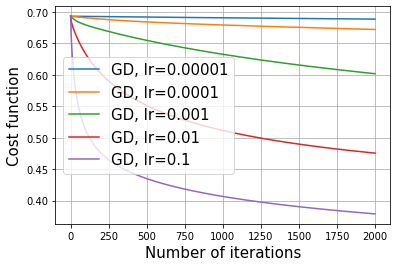

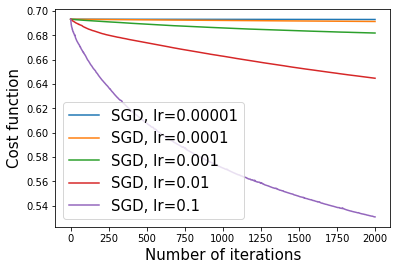

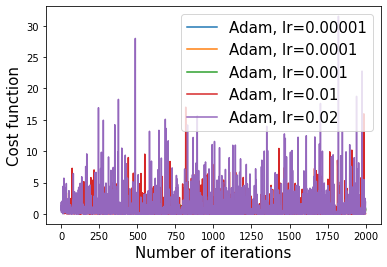

In [ ]:
plot_x = list(range(0, len(gd1["costs"])))

plt.figure()
plt.grid()
plt.plot(plot_x, gd1["costs"], label="GD, lr=0.00001")
plt.plot(plot_x, gd2["costs"], label="GD, lr=0.0001")
plt.plot(plot_x, gd3["costs"], label="GD, lr=0.001")
plt.plot(plot_x, gd4["costs"], label="GD, lr=0.01")
plt.plot(plot_x, gd5["costs"], label="GD, lr=0.1")
plt.xlabel(u"Number of iterations",fontsize = 15)
plt.ylabel(u'Cost function',fontsize = 15)
plt.legend(fontsize = 15)
plt.show()
plt.plot(plot_x, sgd1["costs"], label="SGD, lr=0.00001")
plt.plot(plot_x, sgd2["costs"], label="SGD, lr=0.0001")
plt.plot(plot_x, sgd3["costs"], label="SGD, lr=0.001")
plt.plot(plot_x, sgd4["costs"], label="SGD, lr=0.01")
plt.plot(plot_x, sgd5["costs"], label="SGD, lr=0.1")
plt.xlabel(u"Number of iterations",fontsize = 15)
plt.ylabel(u'Cost function',fontsize = 15)
plt.legend(fontsize = 15)
plt.show()
plt.plot(plot_x, adam1["costs"], label="Adam, lr=0.00001")
plt.plot(plot_x, adam2["costs"], label="Adam, lr=0.0001")
plt.plot(plot_x, adam3["costs"], label="Adam, lr=0.001")
plt.plot(plot_x, adam4["costs"], label="Adam, lr=0.01")
plt.plot(plot_x, adam5["costs"], label="Adam, lr=0.02")
plt.xlabel(u"Number of iterations",fontsize = 15)
plt.ylabel(u'Cost function',fontsize = 15)
plt.legend(fontsize = 15)
plt.show()